# Halmozó algoritmus

<b>Forrás: </b>{cite:p}`moussa_3`

Helyezzünk el egy vásznon köröket úgy, hogy azok ne metsszék egymást.

## Szükséges könyvtárak importálása

In [1]:
from PIL import Image, ImageDraw
import random
import math

## Vászon és <code>draw</code> objektum létrehozása

In [2]:
image_width = 500
image_height = 500

image = Image.new("RGB", (image_width, image_height))
draw = ImageDraw.Draw(image)

## Vászon "kiürítése"

A PIL nem kezel rétegeket, csak sorrendiséget. Ebből kifolyólag a vászon megtisztítható egy vászon méretű téglalap megrajzolásával.

In [3]:
def resetImage(width, height, bg):
    draw.rectangle([0, 0, width, height], fill=bg)

## Véletlen kör generálása függvénnyel

In [4]:
def genEllipse():
    x = random.randint(0, 500)
    y = random.randint(0, 500)
    r = random.randint(5, 100)
    return x, y, r

## Kör rajzolása paraméterek alapján

In [5]:
def drawEllipse(x, y, r):
    draw.ellipse([x - r, y - r, x + r, y + r], outline="white", fill="black")

## Metsző körök kiszűrése

In [6]:
def drawCheck(distance, radii):
    if distance > radii:
        return True
    else:
        return False

## Kész program

A program minden megrajzolt kör adatait hozzáadja egy listához, majd a soron következő kör adatait összeveti a lista összes elemével. Így kiderül, hogy az alakzat megrajzolható-e.

- hogyan lehetne kiíratni, hány kört rakott le a program?
- a program számítsa ki a felhasznált és felhasználatlan terület arányát
- hogyan lehetne a nagy körökbe tovább kisebb köröket pakolni metszés nélkül?

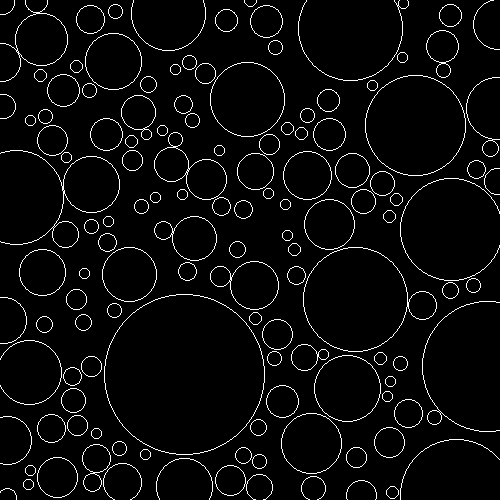

In [7]:
resetImage(image_width, image_height, "black")

check = True
circles = []

for i in range(0, 10000):
    x, y, r = genEllipse()

    for circle in circles:
        distance_x = abs(x - circle[0])
        distance_y = abs(y - circle[1])
        distance = int(math.sqrt(pow(distance_x, 2) + pow(distance_y, 2)))

        radii = r + circle[2]
        check = drawCheck(distance, radii)
        if check == False:
            break
    if check == True:
        circles.append((x, y, r))


for circle in circles:
    x, y, r = circle
    drawEllipse(x, y, r)

display(image)